<a href="https://colab.research.google.com/github/abrange/mit-deeplearning/blob/main/module_1/Deep_Learning_Mastering_Neural_Networks_Module_2_Basics_of_Python_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2: Basics of Python for Machine Learning**

## Introduction
In the previous notebooks, we covered a brief introduction to the Python programming language and its basic capabilities. We will now build upon those basic Python building blocks and investigate how to use those concepts to perform two classic machine learning tasks.
In this notebook, we will write a simple implementation of a simple neural network consisting of a **single neuron**. We will also implement basic gradient-descent training algorithms for single neuron models.

We will start with application of a single neuron model to **regression**: predicting some real value $\hat{y}^{(i)} = f(x^{(i)})$ for some datapoint $i$ (where we have used the superscript notation $(i)$ to indicate which of $n$ datapoints we are considering). We will use Python to directly implement the forward calculation of $y$ as well as to calculate its gradient with respect to weights. We will also implement a basic gradient descent training algorithm, to learn those weights.

Then, as a second application of a single neuron model, we will consider **classification**.
As we learned in Module 1, the single neuron can be used to implement a binary classifier, also known as **logistic regresssion**. Binary classification and training is another subset of supervised learning, where we train using data containing input-output $(x^{(i)}, y^{(i)})$ pairs. In this case, our outputs are now labels that can belong to one of only two classes. Here, our single neuron model will output a real value between 0 and 1, which represents the probability of the input $x^{(i)}$ having the positive (1) label.

## Single Neuron Models

Our single neuron models consist of a single neuron or node, that sums weighted multiplications of the features of an input sample, adds a bias term, and then passes that sum through some activation function. For regression, we will use a linear activation function, i.e., just the identity function. For classification, we will use a sigmoid function.

More specifically, our single neuron model will take the dot product of an input training example $x^{(i)}$ with some learned weights $w$ and adding a learned bias $w_0$ to produce a pre-activation $z$. We then apply some activation function $f$ to $z$ to produce an activation $a$, which for this single neuron will be our output prediction $\hat{y}$. Importantly, $x$ and $w$ can be vectors, which we will just represent as lists in our Python code. We will use a subscript notation, e.g., $x_j$ to indicate feature $j$ within data input $x$, where $j$ goes from 1 to $m$ total features.

The following is the formal mathematical notation for our single neuron model:  

$$
z = w^T x + w_0\\
a = f(z) \\
y = a
$$

## Single Neuron Regression Model:

In the following code block, we implement the necessary setup for a single neuron regression model in Python. This will use a linear function $f(z) = z$ as the activation function.

In [2]:
# First we need to import packages that will be used for visualization.
# You can ignore this for now as we will explain further in a future notebook
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def single_neuron_regression_model(w, w_0, x):
    #AB Note: w and x are python enumerables, so we may not know it length in advance.
    # Perform the dot product on the input x and the learned weights w
    z = 0
    for feature, weight in zip(x, w):
        z += feature * weight
    z += w_0  #Add the bias term

    # Apply the activation function, and return
    a = linear(z)
    return a

# simple linear activation function: it just returns identity
# AB Note: An identify function, is a function that returns the same input without modifing it.
# example: f(x) = x
def linear(z):
    return z

# You can see that we wrote our single neuron regression function without making an
# assumption about how many dimensions are in the input data (e.g., we might have
# only one x feature, or 10 features, or any other number of features). This is
# key so that the model can learn using a dataset with any dimension x vector.

In [17]:
# Test: model output for a single 2D datapoint:
x = [1, 2]
w = [5, 3]
w_0 = -8

y = single_neuron_regression_model(w, w_0, x)
print("input", x, "=> output", y)

input [1, 2] => output 3


## Training our regression model - Gradient Descent

Now that we have implemented a regression model function, we can use it to make predictions for any arbitrary input. However, without a set of trained weights, our model prediction function won't actually provide good predictions based on our data.

In order to solve that problem, we need to implement a training algorithm to find good weights $w$ and $w_0$ based on our data set. We will use gradient-descent, a foundational pillar in deep learning, to find the weights that minimize a cost function, $J$, where $J$ is the total *loss* $L$ over our training data:

$$ J = \sum_i^n L(\hat{y}^{(i)}, y^{(i)})$$

We will begin with a relatively simple loss function appropriate for the regression problem: we will use squared error (SE) loss where $\epsilon^{(i)}$ is our error for any given sample $i$:

$$ L_{SE}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y_i} - y_i)^2 = \frac{1}{2} \epsilon^2 $$

The training process goes as follows:
* We will perform the training loop for a specified number of iterations through our dataset, also known as epochs.
* In each epoch, we will look at each input and output $(x^{(i)},y^{(i)})$ pair. For each pair, we:

  * Calculate the loss $L$ between the correct value $y$ and the predicted value $\hat{y}$
  * Calculate the gradient of the loss with respect to each weight, and
  * Update the weights based on the gradient and the learning rate, $\eta$:
  
$$ w_{j,new} = w_j - \eta \frac{dJ}{dw_j}$$
  
This is the basic concept of gradient based learning: we are nudging each weight along the gradient of the cost function with respect to that weight, to help the neural network predict more accurately.

### Gradient descent with squared error (SE) loss

In the case of our squared error loss, for any sample data point $i$ this works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{SE}}{dw_j}  
  = \frac{dL_{SE}}{d\hat{y}} \frac{d\hat{y}}{dw_j}
  = (\hat{y} - y) \frac{d\hat{y}}{dw_j} $$

Importantly, we see that we need to be able to calculate the gradient of the model output with respect to each weight:

$$ \frac{d\hat{y}}{dw_j} = \frac{df(z)}{dz} \frac{dz}{dw_j} $$

For the linear activation function $f(z) = z$, the first term is very simple: $\frac{df(z)}{dz} = 1$.

For the second term, recall that

$$ z = w_0 + x_1 \cdot w_1 + \cdots + x_j \cdot w_j + \dots + x_m \cdot w_m $$

so $\frac{dz}{dw_j} = x_j$, except for $w_0$, where $\frac{dz}{dw_0} = 1.$

### Gradient descent implementation -- squared error loss:

In [18]:
# Now lets define our training function, for the case of squared error (SE) loss.
# Again we will make it indifferent to the dimension of the input data, and make it
# flexible to work with different model functions.
def train_model_SE_loss(model_function, w, w_0,
                        input_data, output_data,
                        learning_rate, num_epochs):
    do_print = False
    for epoch in range(num_epochs):
        total_loss = 0 #keep track of total loss across the data set
        for x, y in zip(input_data, output_data):
            y_predicted = model_function(w, w_0, x)
            error = y_predicted - y
            total_loss += (error**2)/2
            if do_print: print("x:", x, "y:", y, "error:", error)
            if do_print: print(" old weights:", w, w_0)

            # update bias coefficent using gradient w.r.t w_0
            w_0 -= learning_rate * error * 1

            # update other model coefficients using gradient w.r.t that coefficient
            for j, x_j in enumerate(x):
                w[j] -= learning_rate * error * x_j
            if do_print: print(" new weights:", w, w_0)

        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: #every few epochs, report on progress
            print("epoch", epoch, "has total loss", total_loss)

    return w, w_0

In [19]:
# We will use this function to evaluate how well our trained regression
# model perfoms. This will calculate the mean square error over our data.
def evaluate_regression_accuracy(model_function, w, w_0, input_data, output_data):
    total_loss = 0
    n = len(input_data)
    for x, y in zip(input_data, output_data):
        y_predicted = model_function(w, w_0, x)
        error = y_predicted - y
        total_loss += (error**2)/2
    accuracy = total_loss / n
    print("Our model has mean square error of", accuracy)
    return accuracy

## Single Neuron Regression Example

Now that we have our regression model function and our training function, all that's left to do is call each of those on a dataset! Below, we will train the single neuron on a toy dataset and visualize the fit.

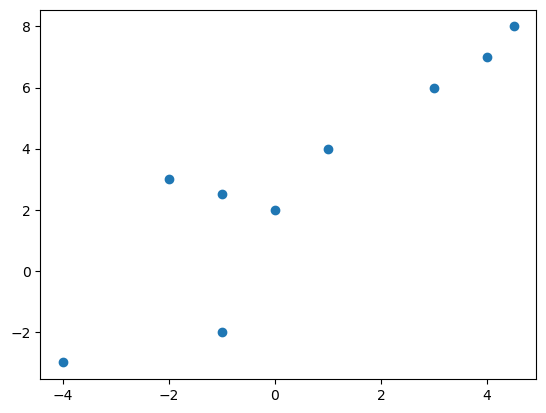

In [20]:
# Here we have a simple 1D set of input data: a list of x points, each a list of length 1,
# and with a corresponding y response.
X_1D = [[1], [-2], [3], [4.5], [0], [-4], [-1], [4], [-1]]
Y_1D = [4,   3,    6,   8,     2,   -3,   -2,   7,   2.5]

# This utility function will allow us to visualize a given 1D dataset.
# You don't need to understand this code right now.
def plot_dataset_1D(x, y):
    x_np = np.array(x)
    y_np = np.array(y)
    plt.scatter(x_np[...,0], y_np)

# This utility function will allow us to visualize a 1D fit.
def plot_fit_1D(X, w, w_0):
    ylim = plt.ylim()
    x_np = np.array(X)
    y_pred = np.array([single_neuron_regression_model(w, w_0, x) for x in X])
    plt.plot(x_np[...,0], y_pred, color="red")
    plt.ylim(ylim)

# Visualize the above dataset
plot_dataset_1D(X_1D, Y_1D)
# plot_fit_1D(X_1D, [1, 2], 0.5)

### Learn weights for our regression model!

epoch 0 has total loss 75.15118164194563
epoch 1 has total loss 40.109157956509094
epoch 2 has total loss 29.801523004849642
epoch 3 has total loss 25.47970121810249
epoch 4 has total loss 22.84563043777799
epoch 5 has total loss 20.86922066083035
epoch 6 has total loss 19.269845776759738
epoch 7 has total loss 17.945486824052068
epoch 8 has total loss 16.841512143299816
epoch 9 has total loss 15.91945696552539
epoch 10 has total loss 15.148892782711584

Final weights:
[1.2616634248232683] 1.589875809042491
Our model has mean square error of 1.5758191255565894


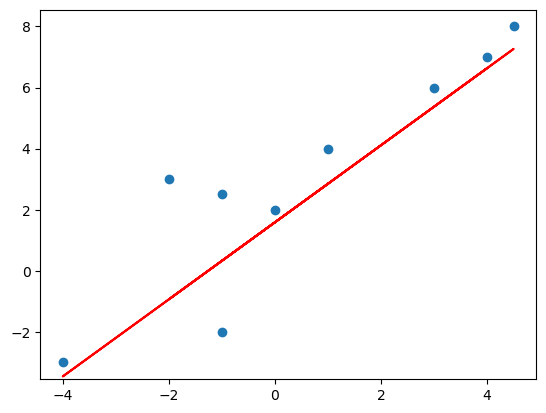

In [21]:
# In this example we set the initial weights to zero and the learning rate
# relatively small.
w_0 = 0
w = [0]
learning_rate = 0.01
epochs = 11

w, w_0 = train_model_SE_loss(single_neuron_regression_model, w, w_0,
                             X_1D, Y_1D,
                             learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_regression_accuracy(single_neuron_regression_model, w, w_0, X_1D, Y_1D)

plot_dataset_1D(X_1D, Y_1D)
plot_fit_1D(X_1D, w, w_0)

# Single Neuron Classification Model
For the classification problem, we need to implement only a few changes. First, we change the activation function to a sigmoid; this squashes the pre-activation $z$ down to an activation (output) that is between 0 and 1. We also need to implement the gradient calculation, with this sigmoid activation function.

Finally, for the classification problem, we will use a different loss function: the negative log-likelihood (NLL) loss. This will enable our previous training code to still work, but for the classification rather than regression problem.

### Gradient descent with negative log-likelihood (NLL) loss

In the case of our NLL loss, for any sample data point $i$, the gradient of $J$ with respect to weights works out to:

$$ \frac{dJ}{dw_j} = \frac{dL_{NLL}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dw_j}  
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\hat{y}}{dz} \frac{dz}{dw_j}
  = \frac{dL_{NLL}}{d\hat{y}} \frac{d\sigma{(z)}}{dz} \frac{dz}{dw_j} .
 $$

For the first term, we recall our definition $L_{NLL} = y \log{\hat{y}} + (1-y)\log{(1-\hat{y})}$,
giving us the following after some algebra:

$$ \frac{dL_{NLL}}{d\hat{y}} = \frac{y-\hat{y}}{\hat{y}(1-\hat{y})} .$$

For the second term, our derivative of the activation function $\sigma(z)$, we get:

$$ \frac{d\sigma{(z)}}{dz} = \sigma(z)(1-\sigma(z)  = \hat{y}(1-\hat{y}).$$

And finally, the last term is simply $\frac{dz}{dw_j} = x$, except for $\frac{dz}{dw_0} = 1$.


In [22]:
def single_neuron_classification_model(w, w_0, x):
    # Perform the dot product on the input x and the learned weights w
    z = 0
    for feature, weight in zip(x, w):
        z += feature * weight
    z += w_0  #Add the bias term

    # Apply the activation function, and return
    a = sigmoid(z) #ONLY CHANGE!
    return a

# sigmoid activation function; squashes a real value z to between 0 and 1
def sigmoid(z):
    non_zero_tolerance = 1e-8 # add this to divisions to ensure we don't divide by 0
    return 1 / (1 + math.exp(-z) + non_zero_tolerance)

<function matplotlib.pyplot.show(close=None, block=None)>

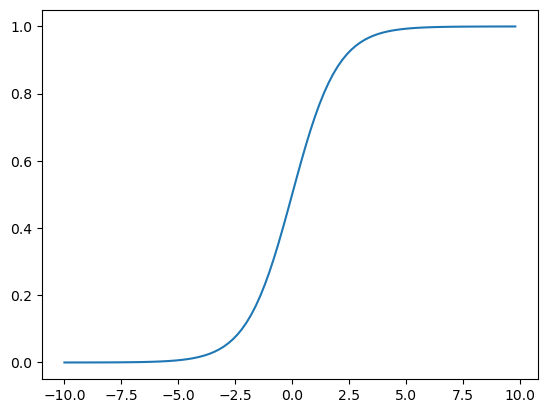

In [23]:
# Let's visualize the Sigmoid function below:
sig_x = np.arange(-10, 10, .2)
sig_y = [sigmoid(x) for x in sig_x]
plt.plot(sig_x, sig_y)
plt.show

We can see from the above graph that the Sigmoid function effectively "squashes" all inputs between the values of 0 and 1! This is perfect for our logistic regression use case.

In [ ]:
# Test: model output for a single 2D datapoint:
x = [1, 2]
w = [5, 3]
w_0 = -8

y = single_neuron_classification_model(w, w_0, x)
print("input", x, "=> output", y)

input [1, 2] => output 0.9525741177484588


## Single Neuron Classification Example

Now we turn to training the single neuron classifier. Here we will use our classification function and adapt our training function to use NLL loss.

In [24]:
# Training process, using negative log likelihood (NLL) loss --
# appropriate for classification problems
#
def train_model_NLL_loss(model_function, w, w_0,
                         input_data, output_data,
                         learning_rate, num_epochs):
    non_zero_tolerance = 1e-8 # add this to log calculations to ensure we don't take the log of 0
    do_print = False
    for epoch in range(num_epochs):
        total_loss = 0 #keep track of total loss across the data set
        for x, y in zip(input_data, output_data):
            y_predicted = model_function(w, w_0, x)
            nll_loss = -(y * math.log(y_predicted + non_zero_tolerance) + (1-y) * math.log(1-y_predicted + non_zero_tolerance))

            total_loss += nll_loss
            if do_print: print("x:", x, "y:", y, "nll_loss:", nll_loss)
            if do_print: print(" old weights:", w, w_0)

            # update bias coefficent using gradient w.r.t w_0
            w_0 -= learning_rate * (y_predicted - y)

            # update other model coefficients using gradient w.r.t that coeff
            for j, x_j in enumerate(x):
                w[j] -= learning_rate * (y_predicted - y) * x_j

            if do_print: print(" new weights:", w, w_0)

        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: #every few epochs, report on progress
            print("epoch", epoch, "has total loss", total_loss)

    return w, w_0

In [25]:
# We will use this function to evaluate how well our trained classifier perfoms
def evaluate_classification_accuracy(model_function, w, w_0, input_data, labels):
    # Count the number of correctly classified samples given a set of weights
    correct = 0
    n = len(input_data)
    for x, y in zip(input_data, labels):
        y_predicted = model_function(w, w_0, x)
        label_predicted = 1 if y_predicted > 0.5 else 0
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    accuracy = correct / n
    print("Our model predicted", correct, "out of", n,
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

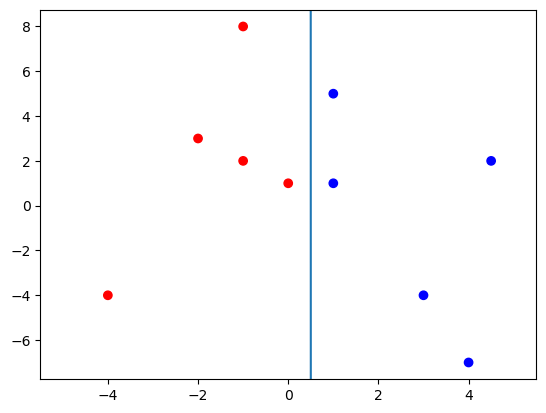

In [27]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = [[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]]
# And their corresponding labels
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# This utility function will allow us to visualize a given 2D dataset.
# You don't need to understand this code right now.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# This utility function will allow us to visualize a 2D decision boundary
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)

# Visualize the above dataset
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D([1, 0.0001], -0.5)


We can see from the plot that the dataset is linearly separable, meaning we can separate the positive samples (blue) from the negative samples (red) with a straight line.

## Training Real Weights -- Single Neuron Classifier

Now that we have our dataset, we would like to train our single neuron classification model to come up with a set of weights that will accurately classify our dataset. In order to do this, we have three different knobs we can turn: the initial weights, the learning rate, and the number of epochs. In the following examples we will see how each of these impacts the model's ability to converge on an accurate decision boundary.

As a general rule of thumb, we would like our learning rate to be small compared to the values of our input data, our initial weights relatively small (often, randomly initialized), and the number of epochs relatively large. There is a lot of research that has been done to determine the optimal settings for these parameters, so this is definitely a simplification.

epoch 0 has total loss 6.508594077659496
epoch 1 has total loss 5.46211191013139
epoch 2 has total loss 4.821047709918714
epoch 3 has total loss 4.376407793867182
epoch 4 has total loss 4.044631318017442
epoch 5 has total loss 3.785495957355281
epoch 6 has total loss 3.5764951960506712
epoch 7 has total loss 3.4037356044647034
epoch 8 has total loss 3.2580744775443593
epoch 9 has total loss 3.1332214359416266
epoch 10 has total loss 3.0247010050826195

Final weights:
[0.5960284097028588, -0.13469258109084148] -0.010512924479684558
Misclassify [1, 5] 1 with activation 0.47802730360403245
Our model predicted 9 out of 10 correctly for 90.0 % accuracy


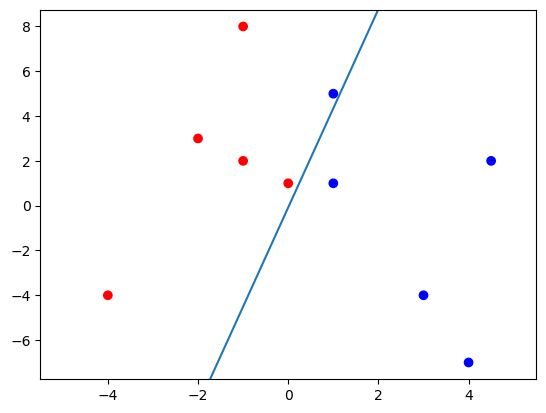

In [28]:
# In this example we set the initial weights to zero and the learning rate
# relatively small. However, we only train for a few epochs which is not
# enough to converge on an accurate classifier.
w_0 = 0
w = [0, 0]
learning_rate = 0.01
epochs = 11

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

epoch 0 has total loss 6.223923692215003
epoch 10 has total loss 2.9287154378367712
epoch 20 has total loss 2.3584449039881488
epoch 30 has total loss 2.0636076120006903
epoch 40 has total loss 1.8696299804962355
epoch 50 has total loss 1.7267167165811537
epoch 60 has total loss 1.6144108218404705
epoch 70 has total loss 1.5224295144979199
epoch 80 has total loss 1.4448950765018669
epoch 90 has total loss 1.3781364940480267
epoch 100 has total loss 1.319708591557062

Final weights:
[1.7028723012501872, -0.09064040426016721] -0.1352352402813103
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


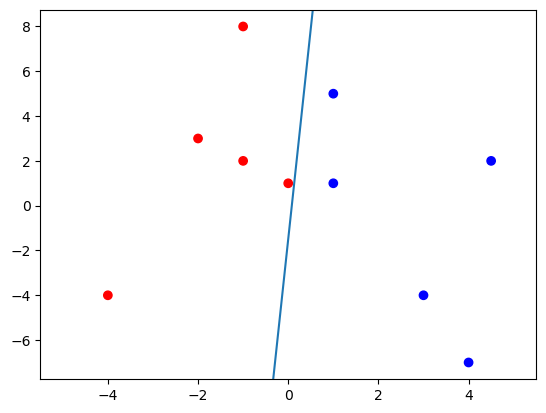

In [29]:
# In general, it's not so good to initialize all the weights to zero.
# Here, we'll initialize to some small non-zero values, and train
# for more epochs.
w_0 = 0.1
w = [0.1, 0.1]

# In practice, weights are typically initially randomized, e.g.,
# to Normal (Gaussian) values, which works well when the input
# data has been normalized (unlike our data). You can uncomment
# and try these too.
## w_0 = random.gauss(0,1)
## w = [random.gauss(0,1) for i in range(2)]

learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

## Your Turn: 3D Dataset

Now that we have implemented the simple single classifier on a 2D dataset, it's your turn. We will give you a 3D dataset and you should seek to train a single neuron classifier on it:

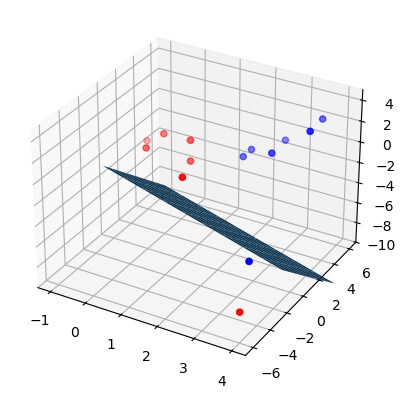

In [30]:
# Below is a 3D dataset of binary labeled samples. You should be able to use
# the existing functions to train a perceptron that perfectly classifies the
# dataset with a decision plane
input_data = [
     [1,1,1],
     [1,1,-1],
     [-1,4,-3],
     [2,4,-1],
     [3.5,6,2],
     [4,-6,-7],
     [2,-4,2],
     [4,-5,-3],
     [0,2,0],
     [3,2,1],
     [4,2,4],
     [2.5,6,-1],
     [0,0,0],
     [2,3,-1]]
labels = [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

# This is a utility function for displaying the dataset in a 3D graph
# Don't worry about this code for now
def plot_3d_dataset(x, y):
    x_np_3d = np.array(x)
    x_np_3d.reshape(len(x),3)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_np_3d[...,0], x_np_3d[...,1],x_np_3d[...,2], color = colors)
    return ax

# This is a utility function for displaying the 3D decision boundary for a given
# set of weights
def plot_3d_decision_boundary(ax, w, w_0):
  x = np.linspace(-1,4,10)
  y = np.linspace(-1,6,10)
  X,Y = np.meshgrid(x,y)
  Z = (-X*w[0] - Y*w[1] - w_0)/w[2]
  surf = ax.plot_surface(X, Y, Z)
  ax.set_zlim(-10,5)
  return
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, [1,1,1], 4)

In [ ]:
# TODO: Please fill in the following code to come up with a set of weights
# that classify the dataset to 90% accuracy or better:
w_0 = ...
w = ...

# YOUR CODE HERE

# print("\nFinal weights:")
# print(w, w_0)
# evaluate_classification_accuracy(...)
# ax = plot_3d_dataset(input_data, labels)
# plot_3d_decision_boundary(ax, w, w_0)

## Solution to 3D Dataset Example

epoch 0 has total loss 8.363485666615288
epoch 10 has total loss 7.129679198130538
epoch 20 has total loss 6.513824362841735
epoch 30 has total loss 6.013497796393884
epoch 40 has total loss 5.588910141366436
epoch 50 has total loss 5.224544288901733
epoch 60 has total loss 4.909687253968319
epoch 70 has total loss 4.635809135238037
epoch 80 has total loss 4.395976969470983
epoch 90 has total loss 4.1845562286780265
epoch 100 has total loss 3.9969710083658487

Final weights:
[1.052996389310848, 0.3737356267223445, 0.18169076458208044] -1.5713639671880502
Misclassify [1, 1, 1] 0 with activation 0.5092636405978489
Our model predicted 13 out of 14 correctly for 92.85714285714286 % accuracy


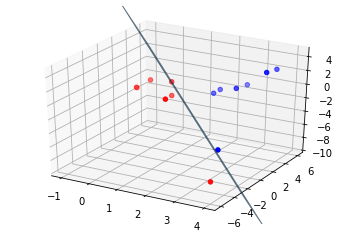

In [ ]:
w_0 = 0.1
w = [0.1, 0.1, 0.1]

#random.seed(123)
#w_0 = random.gauss(0,1)
#w = [random.gauss(0,1) for i in range(3)]

learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
ax = plot_3d_dataset(input_data, labels)
plot_3d_decision_boundary(ax, w, w_0)

## Non Linearly Separable Data

From the example you completed above we can see that given the right training parameters, our single neuron classifier can perfectly classify any linearly separable dataset for any input dimension. This is extremely powerful; however, it is also limiting as most things we care about in the real world are not linearly separable (e.g., images, text, complex financial datasets).

We can see a non linearly separable dataset as below, created by changing the labels of one of the datapoints in our previous examples. If our dataset is not linearly separable, then the single neuron classifier will not be able to find a perfect classifier. This is an important limitation of this very shallow neural network consisting of only a single neuron. However, our gradient descent training algorithm will still try to find good weights to minimize the overall loss, and do a fairly good job.  

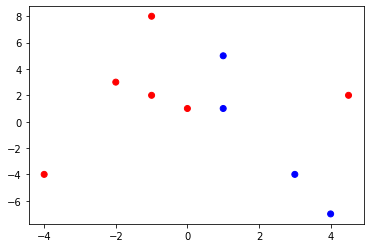

In [ ]:
input_data = [
     [1, 1],
     [1, 5],
     [-2, 3],
     [3, -4],
     [4.5, 2],
     [0, 1],
     [-4, -4],
     [-1, 2],
     [4, -7],
     [-1, 8]]
# By changing the label of our 4th input [4.5, 2],
# we make this dataset not linearly separable
labels = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]

plot_dataset_2D(input_data, labels)

epoch 0 has total loss 7.1243063294158455
epoch 10 has total loss 5.314006910645079
epoch 20 has total loss 5.206572113401352
epoch 30 has total loss 5.149470079687033
epoch 40 has total loss 5.109997902040252
epoch 50 has total loss 5.081327640477265
epoch 60 has total loss 5.060334092542722
epoch 70 has total loss 5.0449323579547345
epoch 80 has total loss 5.033617113584548
epoch 90 has total loss 5.025292821561975
epoch 100 has total loss 5.019162298596705

Final weights:
[0.430791235345579, -0.18136382362069903] -0.4757743787113749
Misclassify [1, 1] 1 with activation 0.4436536170610267
Misclassify [1, 5] 1 with activation 0.27852251634038405
Misclassify [4.5, 2] 0 with activation 0.7502710671457287
Our model predicted 7 out of 10 correctly for 70.0 % accuracy


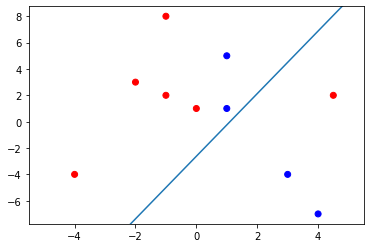

In [ ]:
# No matter what parameters we choose, the single neuron classifier will not be able to
# train a perfect classifier.
# weights good, learning rate small, epochs normal
w_0 = 0.1
w = [0.1, 0.1]
learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels,
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

## Multi Layer Perceptrons -- Towards Deeper Neural Networks

Now that we are faced with a task that our simple single neuron models cannot tackle, we must introduce some new concepts. In order to handle this non-linearly separable dataset (and other more complicated relationship), we will need to extend our single neuron network into a more sophisticated neural network: a multilayer perceptron (MLP). Our single neuron will be an important building block toward deep neural networks, with additional extensions.

Rather than implement more complicated neural networks directly in base Python, we will also shift to using existing machine learning libraries that implement **multiple layers**, as well as enable each layer to have **multiple nodes**. Importantly, these libraries still use the fundamental notions we have implemented above: be able to calculate both the layer output **and** the gradient of the layer output with respect to the weights, so that gradient descent can still be used to adjust and learn the network weights during training.